##Working with 101 food dataset with 10% data

In [1]:
!nvidia-smi

Wed Feb 16 14:40:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Downloading the dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

--2022-02-16 14:40:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  73.0MB/s    in 21s     

2022-02-16 14:40:32 (73.0 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [3]:
#Data extraction from the zipfile
import zipfile

zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
#Walk through the directories and understand it
import os

for dirpath, dirnames, filenames in os.walk("101_food_classes_10_percent"):
  print(f'There are {len(dirnames)} directories in {len(filenames)} in {dirpath}')

There are 2 directories in 0 in 101_food_classes_10_percent
There are 101 directories in 0 in 101_food_classes_10_percent/train
There are 0 directories in 75 in 101_food_classes_10_percent/train/edamame
There are 0 directories in 75 in 101_food_classes_10_percent/train/churros
There are 0 directories in 75 in 101_food_classes_10_percent/train/carrot_cake
There are 0 directories in 75 in 101_food_classes_10_percent/train/french_onion_soup
There are 0 directories in 75 in 101_food_classes_10_percent/train/dumplings
There are 0 directories in 75 in 101_food_classes_10_percent/train/pork_chop
There are 0 directories in 75 in 101_food_classes_10_percent/train/waffles
There are 0 directories in 75 in 101_food_classes_10_percent/train/apple_pie
There are 0 directories in 75 in 101_food_classes_10_percent/train/hot_dog
There are 0 directories in 75 in 101_food_classes_10_percent/train/shrimp_and_grits
There are 0 directories in 75 in 101_food_classes_10_percent/train/tiramisu
There are 0 direc

In [5]:
#Creating a train and test diretories
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [6]:
#Data preparation
import tensorflow as tf
IMAGE_SIZE = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=32,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=32,
                                                                label_mode = "categorical",
                                                                shuffle = False)#We are going to repeat the evaluation so we are setting shuffle=False

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [7]:
train_data.class_names, len(train_data.class_names)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

In [8]:
# Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True)

We created a model checkpoint, now we are going to create a data augumentation because we are working with lesser training images

In [9]:
#Importing the required_model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augumentation = Sequential([
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.2),
        preprocessing.RandomZoom(0.2),
        preprocessing.RandomHeight(0.2),
        preprocessing.RandomWidth(0.2)
])

In [10]:
#Setting up a base model and freeze the layer
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Functional api
inputs = layers.Input(shape=(224,224,3),name = "input_layer")
x = data_augumentation(inputs)
x = base_model(x, training=False)#Putting the base model in the inference mode so, we can use without updating weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data.class_names), activation= "softmax", name = "output_layer")(x)
model = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_____________________________________________

In [12]:
#Compile
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

#Fitting the model
history = model.fit(train_data,
                    epochs = 5,
                    steps_per_epoch=len(train_data),
                    validation_data = test_data,
                    validation_steps = int(0.15*len(test_data)),
                    callbacks =[checkpoint_callback])


Epoch 1/5
237/237 [==============================] - 93s 320ms/step - loss: 3.4788 - accuracy: 0.2465 - val_loss: 2.7037 - val_accuracy: 0.3951
Epoch 2/5
237/237 [==============================] - 58s 242ms/step - loss: 2.3489 - accuracy: 0.4639 - val_loss: 2.2680 - val_accuracy: 0.4489
Epoch 3/5
237/237 [==============================] - 54s 225ms/step - loss: 1.9821 - accuracy: 0.5303 - val_loss: 2.1194 - val_accuracy: 0.4735
Epoch 4/5
237/237 [==============================] - 50s 208ms/step - loss: 1.7568 - accuracy: 0.5740 - val_loss: 2.0434 - val_accuracy: 0.4801
Epoch 5/5
237/237 [==============================] - 47s 198ms/step - loss: 1.6054 - accuracy: 0.6121 - val_loss: 1.9498 - val_accuracy: 0.4971


In [13]:
result = model.evaluate(test_data)

790/790 [==============================] - 59s 74ms/step - loss: 1.7149 - accuracy: 0.5552


In [14]:
result

[1.7148972749710083, 0.5551683306694031]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

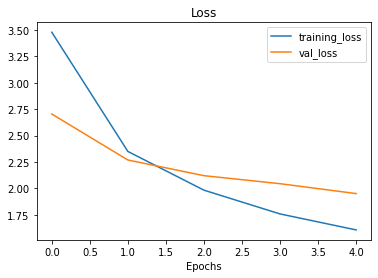

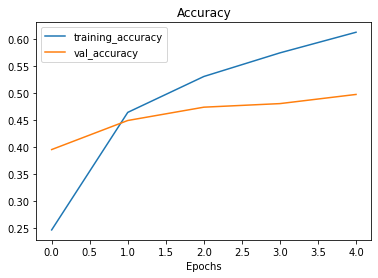

In [16]:
plot_loss_curves(history)

In [17]:
#Fine_tuning the model- Let's unfreeze some of the layers
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable=False

In [18]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [19]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
sequential True
efficientnetb0 True
global_average_pooling True
output_layer True


In [20]:
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ["accuracy"])

In [21]:
fine_tune_epoch = 10

history_fine_tune = model.fit(train_data,
                              epochs = fine_tune_epoch,
                              validation_data = test_data,
                              steps_per_epoch= len(train_data),
                              validation_steps =int(0.15*len(test_data)),
                              initial_epoch = history.epoch[-1])

Epoch 5/10
237/237 [==============================] - 58s 215ms/step - loss: 1.3495 - accuracy: 0.6499 - val_loss: 1.9007 - val_accuracy: 0.5056
Epoch 6/10
237/237 [==============================] - 42s 174ms/step - loss: 1.2341 - accuracy: 0.6726 - val_loss: 1.9230 - val_accuracy: 0.5003
Epoch 7/10
237/237 [==============================] - 43s 179ms/step - loss: 1.1666 - accuracy: 0.6928 - val_loss: 1.9347 - val_accuracy: 0.5064
Epoch 8/10
237/237 [==============================] - 41s 172ms/step - loss: 1.0779 - accuracy: 0.7156 - val_loss: 1.8772 - val_accuracy: 0.5175
Epoch 9/10
237/237 [==============================] - 38s 159ms/step - loss: 1.0345 - accuracy: 0.7234 - val_loss: 1.9182 - val_accuracy: 0.5077
Epoch 10/10
237/237 [==============================] - 37s 153ms/step - loss: 0.9629 - accuracy: 0.7469 - val_loss: 1.8696 - val_accuracy: 0.5215


In [22]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-16 14:56:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-16 14:56:10 (65.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



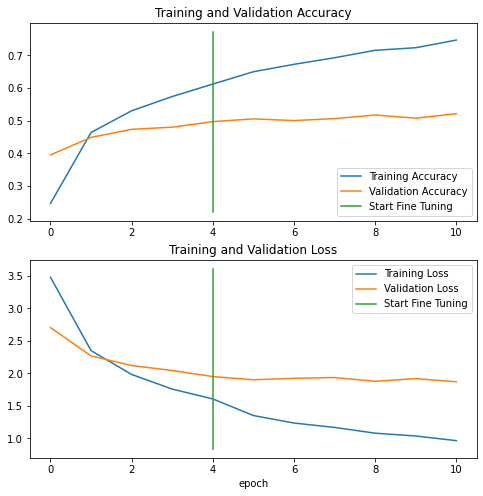

In [23]:
from helper_functions import compare_historys
compare_historys(history, history_fine_tune, initial_epochs=5)